**Task:-** 

EF-2: Try to make generative model of jet images, using a AUC of a discriminator to distinguish Generative model data / real data as metric

From https://github.com/makagan/SSI_Projects/blob/main/jet_notebooks/1.LHCJetDatasetExploration.ipynbfrom 

In [1]:
## Reading the files
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 # Data already downloaded 
# let's open the file
fileIN = '../jet_notebooks/Data-MLtutorial/JetDataset/jetImage_7_100p_30000_40000.h5'
f = h5py.File(fileIN)
# and see what it contains
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


In [3]:
# These are the quantities we are dealing with
featurenames = f.get('jetFeatureNames')
print(featurenames[:])
# the b is due to the byte vs utf-8 encoding of the strings in the dataset
# just ignore them for the moment

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']


In [4]:
print(f.get('jetImage'))

<HDF5 dataset "jetImage": shape (10000, 100, 100), type "<f8">


In [5]:
jet_data = np.array(f.get('jets'))
target = jet_data[:,-6:-1]
# shape of the dataset
print("Dataset shape:")
print(target.shape)
print("First five entries:")
for i in range(5):
    print(target[i])
print("Last 5 entries:")
for i in range(-5,0):
    print(target[i])

Dataset shape:
(10000, 5)
First five entries:
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
Last 5 entries:
[0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]


In [6]:
data = np.array(jet_data[:,:-6])
print(data.shape)

(10000, 53)


In [7]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        # notice the use of numpy masking to select specific classes of jets
        my_data = input_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
    #del fig, ax
    #return fig, ax

# The particle-list dataset
In this case, we look at the particle-related features that we have stored for each jet constituent. The structure of the dataset is similar to that of the physics-motivated features, except for the fact that we have now a double-index dataset: (jet index, particle index). The list is cut at 100 constituents /jet. If less are found, the dataset is completed filling it with 0s (zero padding)

In [10]:
p_featurenames = f.get("particleFeatureNames")
print(p_featurenames[:])

[b'j1_px' b'j1_py' b'j1_pz' b'j1_e' b'j1_erel' b'j1_pt' b'j1_ptrel'
 b'j1_eta' b'j1_etarel' b'j1_etarot' b'j1_phi' b'j1_phirel' b'j1_phirot'
 b'j1_deltaR' b'j1_costheta' b'j1_costhetarel' b'j1_pdgid']


In [11]:
p_data = f.get("jetConstituentList")
print(p_data.shape)

(10000, 100, 16)


In [12]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot_p(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        my_data = input_data[:,:,feature_index]
        # notice the use of numpy masking to select specific classes of jets
        my_data = my_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index].flatten(), 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
    #del fig, ax
    #return fig, ax

## Generative model of jet images with AE

In [14]:
import keras
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Importing keras and related modules
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Lambda
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Concatenate



# Data Preprocessing



Using the jet image dataset, you can adapt the Graph GAN architecture to generate graph-structured data. Since the jet image dataset isn't inherently graph-structured, we can represent each jet image as a graph using a simplified approach. Here's how you could do it:

1. **Convert Jet Images to Graphs:** Each jet image can be represented as a graph, where the nodes represent pixels, and edges connect neighboring pixels. You can create adjacency matrices for each image by considering the pixel intensities as edge weights.

2. **Graph GAN Architecture:** The architecture remains similar, but instead of nodes and features, you're dealing with pixels and intensities. The generator takes random noise as input and generates adjacency matrices for the graphs. The discriminator evaluates whether a given adjacency matrix represents a real or generated image.

In [1]:
from spektral.layers import GraphConv


ModuleNotFoundError: No module named 'spektral'

In [15]:
# Prepare the data
# Assuming you have jet images in a numpy array 'jet_images'
# Normalize the pixel values between 0 and 1
jet_images = np.array(f.get('jetImage')).astype('float32') / 255.0


In [16]:
# Get the shape of the first image in the dataset
first_image_shape = jet_images[0].shape

# Print the dimensions of the first image
print("Dimensions of the first image:", first_image_shape)

Dimensions of the first image: (100, 100)


In [17]:
dataset_shape = jet_images.shape
# Print the shape of the dataset
print("Shape of the dataset:", dataset_shape)
image_size = dataset_shape[1]
print(f'image_size is,',image_size)
num_classes = 10  # Replace with the actual number of classes in your dataset


Shape of the dataset: (10000, 100, 100)
image_size is, 100


In [18]:
# Split the data into training and validation sets
train_size = int(0.8 * len(jet_images))
x_train = jet_images[:train_size]
x_val = jet_images[train_size:]


In [19]:
# Add the batch dimension to your training and validation data
x_train = np.expand_dims(x_train, axis=-1)  # Add a single channel dimension
x_val = np.expand_dims(x_val, axis=-1)

# Model

In [28]:
# model_practice_CVAE
latent_dim = 2  # Dimension of latent space

def build_cvae(input_shape):
    # Encoder
    encoder_input = Input(shape=input_shape)
    label_input = Input(shape=(num_classes,))
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Concatenate()([x, label_input])  # Concatenate labels to the flattened features
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    
    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
    z = Lambda(sampling)([z_mean, z_log_var])
    
    encoder = Model([encoder_input, label_input], [z_mean, z_log_var, z], name='encoder')
    
    # Decoder
    latent_input = Input(shape=(latent_dim,))
    x = Concatenate()([latent_input, label_input])  # Concatenate labels to the latent space
    x = Dense(image_size // 4 * image_size // 4 * 16, activation='relu')(x)
    x = Reshape((image_size // 4, image_size // 4, 16))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    decoder_output = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    decoder = Model([latent_input, label_input], decoder_output, name='decoder')
    
    # CVAE model
    encoder_inputs = [encoder_input, label_input]
    _, _, encoded = encoder(encoder_inputs)
    decoder_inputs = [encoded, label_input]  # Use encoded instead of latent_input
    cvae_output = decoder(decoder_inputs)
    
    cvae = Model(encoder_inputs, cvae_output, name='cvae')
    
    return cvae, encoder, decoder
    





In [29]:
# Reshape the jet images dataset to match the model's input shape
jet_images_reshaped = jet_images.reshape((-1, image_size, image_size, 1))

# Create label data (replace with actual label data)
labels = np.random.randint(0, num_classes, size=jet_images_reshaped.shape[0])
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

# Splitting data into training and validation sets
train_size = int(0.9 * jet_images_reshaped.shape[0])  # 90% for training
train_images, val_images = jet_images_reshaped[:train_size], jet_images_reshaped[train_size:]
train_labels, val_labels = one_hot_labels[:train_size], one_hot_labels[train_size:]


In [30]:
# Build the CVAE model
input_shape = train_images[0].shape
cvae, _, _ = build_cvae(input_shape)


Make sure that you have properly built and compiled your VAE model before trying to access its summary.

In [31]:
# Get the summary of the VAE model
cvae.summary()

Model: "cvae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 2),          85036       ['input_7[0][0]',                
                                 (None, 2),                       'input_8[0][0]']                
                                 (None, 2)]                                                    

In [32]:
# # Training loop
# epochs = 50
# batch_size = 64  # Set the batch size based on dataset size

# for epoch in range(epochs):
#     for _ in range(jet_images_reshaped.shape[0] // batch_size):
#         batch_indices = np.random.randint(0, jet_images_reshaped.shape[0], batch_size)
#         batch = jet_images_reshaped[batch_indices]
#         vae.train_on_batch(batch, batch)
    
#     print(f"Epoch {epoch}/{epochs}, Loss: {vae.evaluate(jet_images_reshaped, jet_images_reshaped, verbose=0)}")

# # Generate and save example images from the decoder
# num_examples = 10
# latent_samples = np.random.normal(size=(num_examples, latent_dim))
# generated_images = decoder.predict(latent_samples)

# # Display or save generated images

In [33]:



# # Training loop
# epochs = 100
# batch_size = 32  # Set the batch size based on dataset size


# history = cvae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, x_val), )


# --------------------------------------
# Compile the CVAE model
cvae.compile(optimizer='adam', loss='binary_crossentropy')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training loop
batch_size = 48

history = cvae.fit([train_images, train_labels], train_images,
                   epochs=50,
                   batch_size=batch_size,
                   validation_data=([val_images, val_labels], val_images),
                   callbacks=[early_stopping])

2023-08-15 20:02:01.123615: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 360000000 exceeds 10% of free system memory.


Epoch 1/50
188/188 [==============================] - 6s 22ms/step - loss: 0.2396 - val_loss: 0.0128
Epoch 2/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 3/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 4/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 5/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 6/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch 7/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 8/50
188/188 [==============================] - 4s 19ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 9/50
188/188 [==============================] - 4s 20ms/step - loss: -0.0027 - val_loss: 0.0039
Epoch 10/50
188/188 [==============================] - 4s 19ms/step - loss: -0.0096 - val_

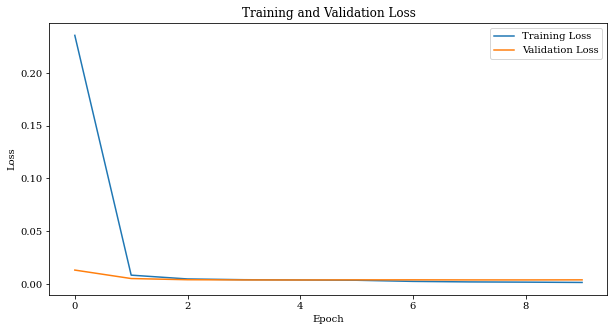

In [26]:
#### Plot the training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



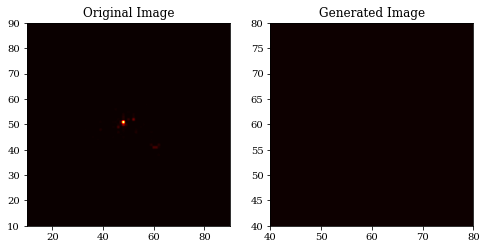

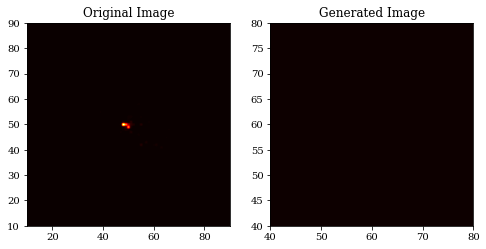

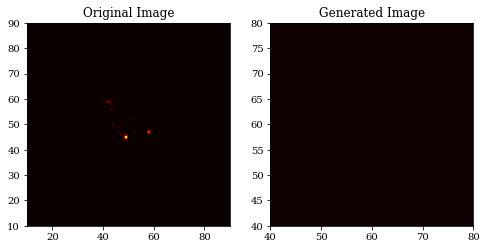

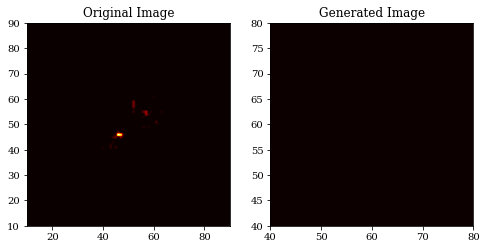

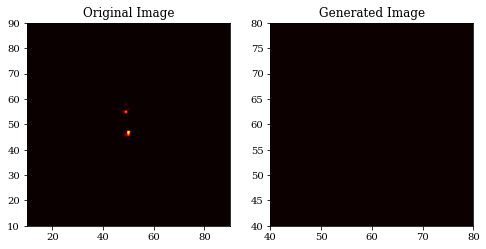

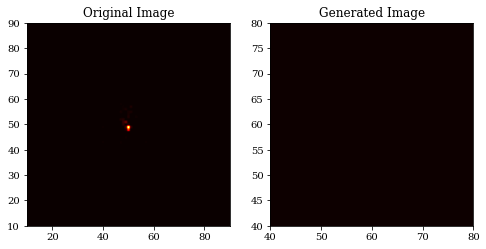

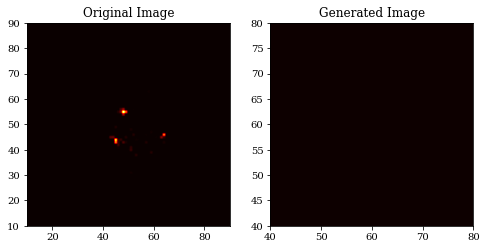

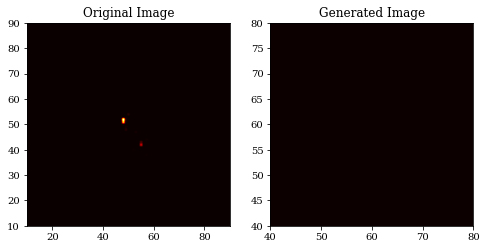

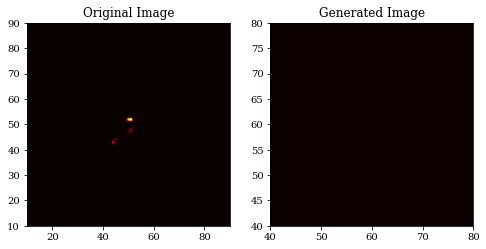

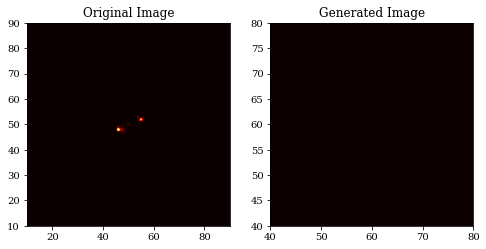

In [35]:
# Generate latent samples (random points in the latent space)
num_examples = 10
latent_samples = np.random.normal(size=(num_examples, latent_dim))
latent_samples_labels = np.random.randint(0, num_classes, size=(num_examples, 1))  # Generate a single label for each sample
latent_samples_one_hot = tf.keras.utils.to_categorical(latent_samples_labels, num_classes=num_classes)

# Get the decoder from the trained CVAE model
_, _, decoder = build_cvae(input_shape)  # Create a new decoder
decoder.set_weights(cvae.get_layer('decoder').get_weights())  # Load trained weights

# Generate images using the decoder
generated_images = decoder.predict([latent_samples, latent_samples_one_hot])

# Display or save generated images
for i in range(num_examples):
    original_image = jet_images_reshaped[i].reshape(image_size, image_size)
    generated_image = generated_images[i].reshape(image_size, image_size)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='hot')
    plt.title('Original Image')
     # Set the limits of the x and y axes for the zoomed-in view
    plt.xlim(10, 90)  # Adjust these values to focus on the region you want
    plt.ylim(10, 90)
    
    
    plt.subplot(1, 2, 2)
    plt.imshow(generated_image, cmap='hot')
    plt.title('Generated Image')
    
    # Set the limits of the x and y axes for the zoomed-in view
    plt.xlim(40, 80)  # Adjust these values to focus on the region you want
    plt.ylim(40, 80)
    
    
#     plt.savefig('/eos/user/s/sraj/www/CUA/generated_image_VAE.png')
#     plt.savefig('/eos/user/s/sraj/www/CUA/generated_image_VAE.pdf')
    plt.show()
    



##### 